# Koneoppiminen: Tehtävä 4: Satunnaismetsä (max. 10 p)

Tässä tehtävässä tulee käyttää Random Forest -menetelmistä sekä **regressio**- että **luokittelumenetelmää**.

**Mikä on Random Forest?** Random Forest -menetelmät keskiarvoistavat useita päätöspuita (engl. decision trees), jotka on koulutettu samalla koulutusdatalla, jas niiden tavoitteena on vähentää varianssia. Menetelmissä voi säätää kuinka montaa päätöspuuta käytetään lopputuloksen saamiseen. Päätöspuut aluksi luodaan ja sitten yhdistetään -> kombinaation tuloksena ns. satunnaismetsä.

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'

Tutki tehtävää varten myös seuraavat scikit Learn -manuaalisivut:
* [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
* [Random forests and other randomized tree ensembles](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles)
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

## Tehtävä 4.1
### Aihe: Tekstiilityöntekijöiden tuottavuus (2 pistettä)
### Aineiston esikäsittely

1. Tutustu ja lataa aineisto osoitteesta [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#) . Lataa aineisto Pandas `DataFrame` -taulukkoon.

2. Jätä pois ne taustamuuttujat, joilla ei ole lopputuloksen kannalta merkitystä tai niiden merkitys on negatiivinen tuloksen kannalta, analysoitavasta datasta.

3. Korvaa aineiston puuttuvat arvot sopivilla arvoilla.

4. Normalisoi koulutusaineisto. Älä kuitenkaan normalisoi luokkamuuttujaa.

5. Luo lisäksi luokkamuuttuja, joka on arvoltaan `0`, jos tuottavuus on *alle 0.5* ja arvoltaan `1`, jos tuottavuus on *tasan tai yli 0.5*. Tallenna tämä `df`-muuttujaan sarakkeeksi `class`. Muista myös poistaa `class`-luokkamuuttuja *X*-alkuisista mallin syötteistä.

In [10]:
# TODO: Kirjoita toteutuksesi tähän soluun.
# TODO: Esikäsittely
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#df = pd.DataFrame({0:[0]}) # alustus. Tämän voi poistaa tehtävää tehtäessä.

df = pd.read_csv('../../data/productivity+prediction+of+garment+employees/garments_worker_productivity.csv')
# Ensin ajattelin että olisi hyvä säilyttää date ja quarter mukana, mutta tein niistä kokeluksi skaalatut numerot ja
# huomasin ettei ne olleet niin tärkeitä että olisi ollut kannattavaa sotkea koodia ja dataa niin paljoa joten
# teen tämän helpoksi ja poitsan epänumeeriset kolumnit alkuun (myös "metatieto" 2p tästä kohdasta viittaisi yksinkertaiseen
# ratkaisuun)
df = df.drop(columns=['date', 'day', 'quarter', 'department', 'team'])
print(df.isna().sum().sum())
df = df.fillna(df.mean())
# Normalisoi koulutusaineisto, mutta ei luokkamuuttujaa
scaler = MinMaxScaler()
df[df.columns.difference(['actual_productivity'])] = scaler.fit_transform(df[df.columns.difference(['actual_productivity'])])

# Luo luokkamuuttuja tuottavuuden perusteella
df['class'] = df['actual_productivity'].apply(lambda x: 1 if x >= 0.5 else 0)

#df.head()

506


In [3]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 

# TODO: Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'class'],
      dtype='object')
First row by position: targeted_productivity    1.000000
smv                      0.450252
wip                      0.047631
over_time                0.273148
incentive                0.027222
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.655172
actual_productivity      0.940725
class                    1.000000
Name: 0, dtype: float64


## Tehtävä 4.2
### Aihe: Regressio satunnaismetsän avulla (3 pistettä)

1. Jaa aineisto koulutus- (70%) ja testausaineistoksi (30%) tallentaen myös luokkamuuttujat omiksi vektoreiksi (`X_train`, `y_train`, `X_test`, `y_test`). Käytä satunnaissiementä `2150`.

Vinkki: älä laita sarakkeita `actual_productivity` tai `class` aineistoon `X`-muuttujiin, koska tuottavuus on selvitettävä luokkamuuttujia.

2. Käytä `scikit-learn`-kirjaston `ensemble`-moduulin [funktioita](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) ja luo regressiomalli satunnaismetsää hyödyntäen. Tehtävässä pyritään ennustamaan `actual_productivity`-muuttujaa. Käytä tässä satunnaissiementä `2100`.

3. Ennusta testausaineiston `actual_productivity`. Tallenna selitetty varianssi `exp_var` ja suurin virhe `max_err` kirjaston `metrics`-moduulin työkaluilla.

In [4]:
# TODO: Kirjoita toteutuksesi tähän soluun.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error


X = df.drop(columns=['actual_productivity', 'class'])
y = df['actual_productivity']

#X_test = X_train = pd.DataFrame({0:[0]}) # alustus. Tämän voi poistaa tehtävää tehtäessä.
exp_var = max_err = None
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2150)

# Luo ja kouluta satunnaismetsäregressiomalli
model = RandomForestRegressor(random_state=2100)
model.fit(X_train, y_train)

# Ennusta testausaineiston actual_productivity
y_pred = model.predict(X_test)
# Laske selitetty varianssi ja suurin virhe
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)


In [5]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# TODO: Tallenna vastaukset exp_var- ja max_err-muuttujiin.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')
print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Test length: 360
Train length: 837
Train columns: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
Explained variance: 0.4171409045839657
Maximum error: 0.6384045033781353


## Tehtävä 4.3
### Aihe: Luokittelu satunnaismetsän avulla (3 pistettä)

1. Muodosta koulutus- ja testausaineisto. Käytä satunnaissiementä `2150`. Huomioi, että nyt ennustetaan `class`-muuttujaa.

2. Käytä `scikit-learn`-kirjaston `ensemble`-moduulin [funktioita](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) ja luo luokittelumalli satunnaismetsää hyödyntäen. Käytä satunnaissiementä 2100. Yritetään siis ennustaa luokkamuuttujaa `class`.

3. Ennusta testausaineiston pohjalta luokkamuuttuja `class`. Luo tarkkuusraportti `cr` ja sekaannusmatriisi `cm` kirjaston `metrics`-moduulin työkaluilla.

In [6]:
# TODO: Kirjoita toteutuksesi tähän soluun.
#X_test = X_train = pd.DataFrame() # alustus. Tämän voi poistaa tehtävää tehtäessä.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
cr = cm = None
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2150)

# Luo ja kouluta satunnaismetsäluokittelumalli
model = RandomForestClassifier(random_state=2100)
model.fit(X_train, y_train)

# Ennusta testausaineiston class-muuttuja
y_pred = model.predict(X_test)

# Luo tarkkuusraportti ja sekaannusmatriisi
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [7]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# TODO: Tulokset ovat cm- ja cr-muuttujissa. 
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 360
Train length: 837
              precision    recall  f1-score   support

           0       0.60      0.41      0.49        44
           1       0.92      0.96      0.94       316

    accuracy                           0.89       360
   macro avg       0.76      0.69      0.71       360
weighted avg       0.88      0.89      0.89       360

[[ 18  26]
 [ 12 304]]


## Tehtävä 4.4
### Aihe: Tulosten tulkinta (2 pistettä)

**Miksi tuloksia tulkitaan?** Tulosanalyysi on äärimmäisen tärkeää koneoppimisessa. Pelkkä (hyväkään) ratkaisu ei usein sellaisenaan riitä, vaan tulosten merkitys pitää ymmärtää "liiketoiminnan" kannalta.

Tulkitse sanallisesti saadut testitulokset.
* Kuinka hyvin regressio ja luokittelu onnistuivat tässä tehtävässä?
* Pohdi myös miten voisit saada parempia luokittelusta?

* Vinkki: Voit kokeilla myös päätöspuiden (decision trees) toimivuutta tehtävässä annetun datasetin kanssa.

### Vastaus: Tulosten tulkinta

Alla pyydettyä rohkeaa ja sekavaa ajattelua näistä tehtävistä. :D

#### Regressio

Regression explained variance oli 0.417 joka tarkoittaa ymmärtääkseni että malli pystyy selittämään vain 41.7% tulosten vaihtelusta. Se ei ole kovin hyvä.
max_err oli 0.638 joka ei myöskään ole ihmeellinen. Mutta miksi näin regression kanssa?


Minulla on suht hyvä fiilis käytetyistä ominaisuuksista ja tulokseni olivat teamsista löytyneitten viitteiden sisällä,
en siis usko että niissä oli välttämättä vikaa. Ainakin matriisista nähtiin että data ei ollut tasapainossa ja 0
arvon ennustus toteutui todella huonosti. Voi olla että regressio ennusti liian rankasti luokkaa 1. Tämä ainakin silmään
näyttäisi olevan totta, kun katsoi y_pred tulosteen.

Piirsin alle nopeasti decisiontreellä tehdyn saman tehtävän, jossa Explained variance: 0.22375556971144184
Maximum error: 0.734280303. Tämä nähdään myös ymmärtääkseni kuvassa. exp_var on pienempi ja monet pisteet ovatkin
toistensa päällä, mutta sitten kun menee väärin niin usein menee todella isosti väärin. Oppimateriaalista voisi keksiä pari syytä:

* Overfitting: Decision trees have a tendency to overfit the training data, meaning they can memorize the training examples and perform poorly on unseen data

* Feature importance: Decision trees may prioritize certain features over others, which can lead to biased feature importance rankings

#### Classifier

Nähtävissä samoja piirteitä. Tässä accuracy näennäisesti hyvä (89%), mutta oikeastihan tässäkin on nähtävissä 
datan epäbalanssia. Datapisteitä oli 360, ja niistä 330 ennustettiin luokkaan 1. Tottakai accuracy silloin näyttää
hyvälle, vaikka toisen luokan ennustaminen oli surkeaa. Se näkyy suoraan myös f1-scoressa. 

Miten tätä voisi parantaa molemmille?

Ainakin yksi olisi nostaa 0.5 rajaa, jolloin datasta tulisi tasapainoisempi. Jos tämä olisi vaikka minun firma ja haluaisin ennustaa tulevaa todellista tuottavuutta ottaen huomioon nämä featuret, niin nostaisin tässä tätä arvoa sillä huomaan että tämä on liian optimistinen arvo ennustamaan tuottavuuden tilaa.

Käytin myös .mean() työkalua puuttuvien arvojen korvaamiseen. Kun alle 0.5 arvoja oli jo valmiiksi paljon vähemmän ja annoin puuttuville arvoilla (n. 500) keskiarvo arvon, se laittoi ykkösluokkaan liikaa dataa? Tämä voisi ainakin vaikuttaa max_err lukuun huomattavasti.

Kokeilin myös antaa näille malleille tarkempia parametreja, esim karsin puitten pituuksia. Tämä paransi tuloksia, joten voisi luulla että malli myös tekee overfittingiä josta sanoin aijemmin.

Test length: 360
Train length: 837
Train columns: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
Explained variance: 0.22375556971144184
Maximum error: 0.734280303


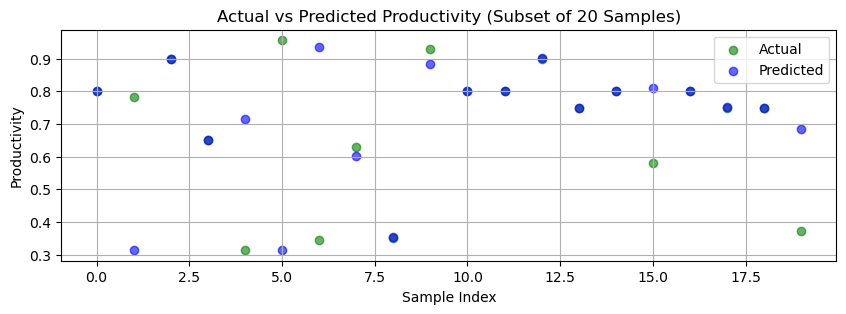

In [8]:
# TODO: Kirjoita toteutuksesi tähän soluun.
# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error


X = df.drop(columns=['actual_productivity', 'class'])
y = df['actual_productivity']

#X_test = X_train = pd.DataFrame({0:[0]}) # alustus. Tämän voi poistaa tehtävää tehtäessä.
exp_var = max_err = None
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2150)

model = DecisionTreeRegressor(random_state=2100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')
print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

# Valitaan pienempi datamäärä kuvan selkeydeksi
subset_size = 20
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]

plt.figure(figsize=(10, 3))

plt.scatter(range(subset_size), y_test_subset, color='green', label='Actual', alpha=0.6)

plt.scatter(range(subset_size), y_pred_subset, color='blue', label='Predicted', alpha=0.6)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Productivity')
plt.title('Actual vs Predicted Productivity (Subset of 20 Samples)')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()
